# Exploratory Data Analysis - EN

Посмотрим как данные кластеризуются. Скормим данные в PCA-трансформер и нарисуем 2d-диаграмму.

In [1]:
# Re-install pytables for hdf support (google colab has old & glitchy pytables)
#!pip uninstall -y tables
#!pip install tables

In [2]:
import pandas as pd
df = pd.read_hdf('fe1.h5')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227654 entries, 0 to 467481
Data columns (total 3 columns):
filename    227654 non-null object
text        227654 non-null object
lang        227654 non-null object
dtypes: object(3)
memory usage: 6.9+ MB


In [3]:
df.head()

,filename,text,lang
0,dataset/20191108/15/1491978796208217930.html,\n\n\n\n\n\n\n\n\n\n\n\nNewcastle United v Bou...,en
4,dataset/20191108/15/6359253557838878602.html,\n\n\n\n\n\n\n\n\n\n\n\nМинкомсвязь негативно ...,ru
6,dataset/20191108/15/8549607152500932485.html,\n\n\n\n\n\n\n\n\n\n\n\nTether Responds to Mar...,en
7,dataset/20191108/15/3752801377276103486.html,\n\n\n\n\n\n\n\n\n\n\n\nAnger over Las Vegas b...,en
10,dataset/20191108/15/5545714965965021212.html,\n\n\n\n\n\n\n\n\n\n\n\nAmerican Truck Simulat...,en


In [4]:
#!pip install nltk

In [5]:
import nltk
#nltk.download('stopwords', download_dir='nltk_data')
nltk.data.path.append('nltk_data')

In [6]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words=stopwords.words('english'))
data = cv.fit_transform(df[df['lang'] == 'en']['text'].values)

CPU times: user 37.4 s, sys: 268 ms, total: 37.6 s
Wall time: 37.6 s


Проверим, удалена ли пунктуация:

In [8]:
',' in cv.get_feature_names(), '.' in cv.get_feature_names(), ':' in cv.get_feature_names()

(False, False, False)

Пунктуация удалена. Хорошо.

Сколько признаков:

In [9]:
data.shape[1]

340401

Посчитаем главные компоненты (Principal Component Analysis):

In [10]:
data

<107186x340401 sparse matrix of type '<class 'numpy.int64'>'
	with 22073237 stored elements in Compressed Sparse Row format>

У PCA нет поддержки разряженных данных и не хватает памяти для полной аллокации. Пробуем TruncatedSVD:

In [11]:
%%time
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD()
pca.fit(data)

CPU times: user 8.5 s, sys: 4.09 s, total: 12.6 s
Wall time: 7.7 s


TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
             random_state=None, tol=0.0)

In [12]:
import matplotlib.pyplot as plt
plt.show() # init

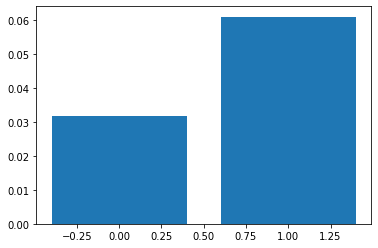

In [13]:
import numpy as np
plt.bar(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.show()

А двух компонентов оказывается не хватает для отображения всех данных. Увы, рисовать нет смысла.

Посмотрим сколько понадобится компонентов для отображения 90% дисперсии.

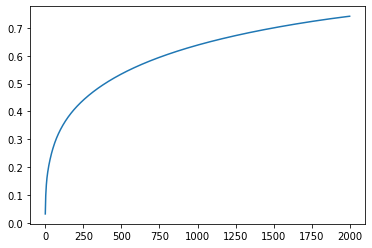

CPU times: user 29min 55s, sys: 4min 44s, total: 34min 39s
Wall time: 20min 32s


In [14]:
%%time
pca = TruncatedSVD(n_components=2000)
pca.fit(data)
plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.show()